<a href="https://colab.research.google.com/github/hijera/NN_colab_hw/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%A0%D1%8F%D0%B4%D1%8B_(%D0%92%D0%BB%D0%B0%D1%81%D0%BE%D0%B2_%D0%90%D0%BD%D1%82%D0%BE%D0%BD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание

    Скачайте материалы к занятию.
    Проанализируйте ряды и сделайте их стационарными.
    Пришлите решение в виде ссылки на GitHub с ноутбуком.



In [53]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
#Скачиваем поочередно ряды
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [54]:
#Подготавливаем тест Дики-Фулера
def test_stationarity(timeseries):

    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    res_arr={}
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    return dfoutput

def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [55]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

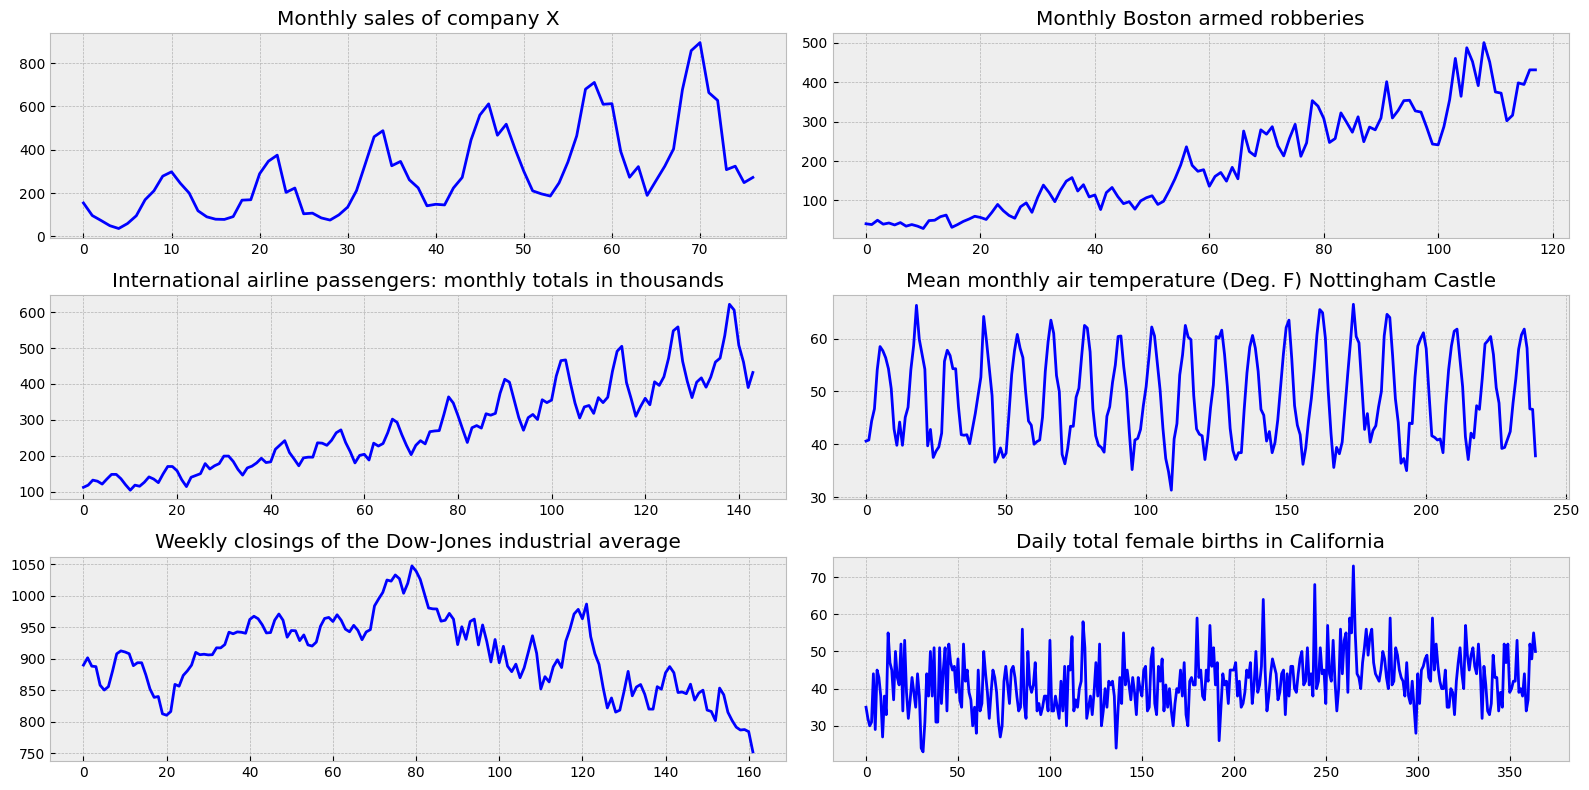

In [56]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

#Ищем стационарные ряды

In [57]:
non_stat=[]
stat=[]
for name, series in all_series.items():
  res=test_stationarity(series)
  print(" ")
  print(name)
  print(res)
  if res['p-value'] < 0.05:
    print("Ряд стационарен")
    stat.append({'name':name,'series':series})
  else:
    print("Ряд нестационарен")
    non_stat.append({'name':name,'series':series})

print("\n\nСтационарные ряды:")
for x in stat:
  print(x['name'])
print("\n\nНестационарные ряды:")
for x in non_stat:
  print(x['name'])

 
Monthly sales of company X
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64
Ряд нестационарен
 
Monthly Boston armed robberies
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64
Ряд нестационарен
 
International airline passengers: monthly totals in thousands
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5

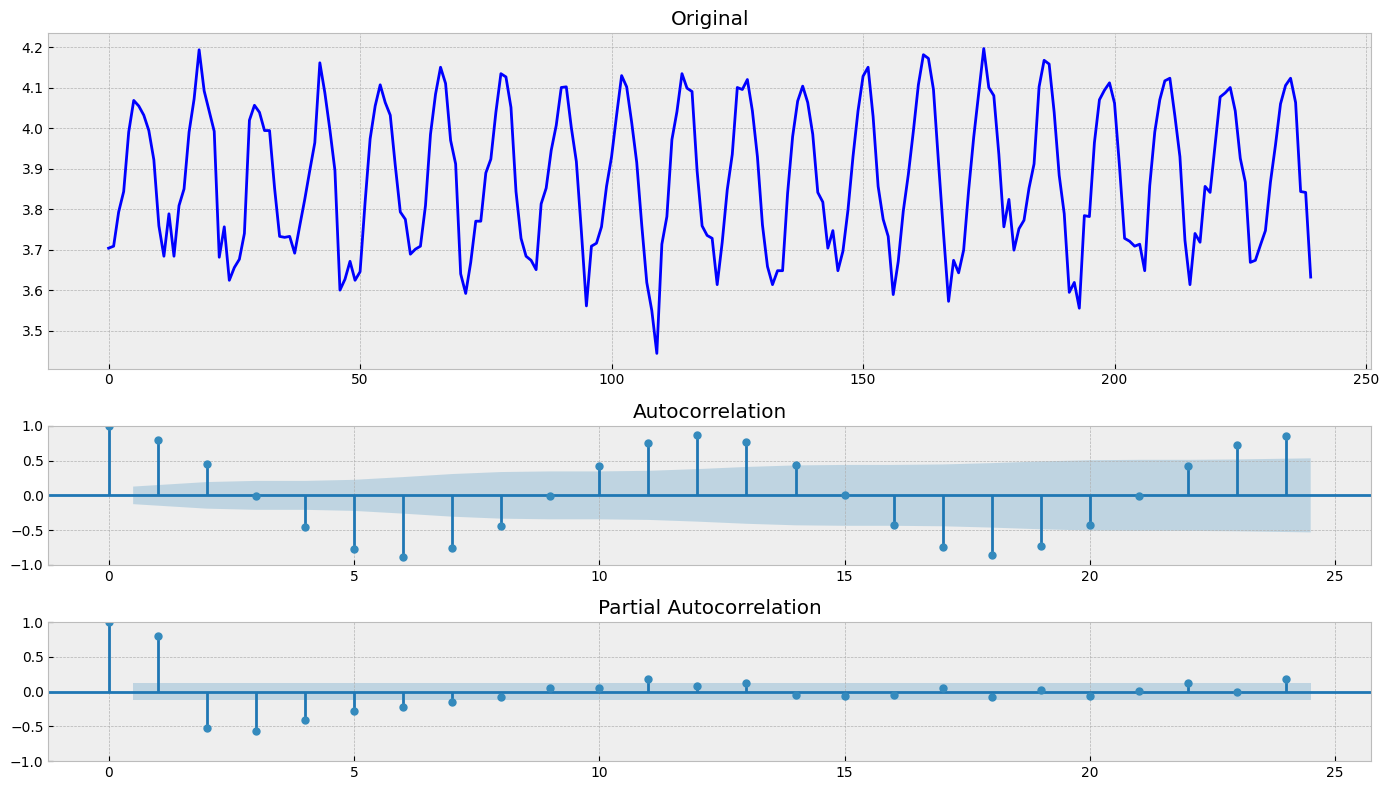

In [58]:
#Проверим теорию графиком кореллограмм
tsplot(boxcox(mean_monthly_temp['Deg'],0))

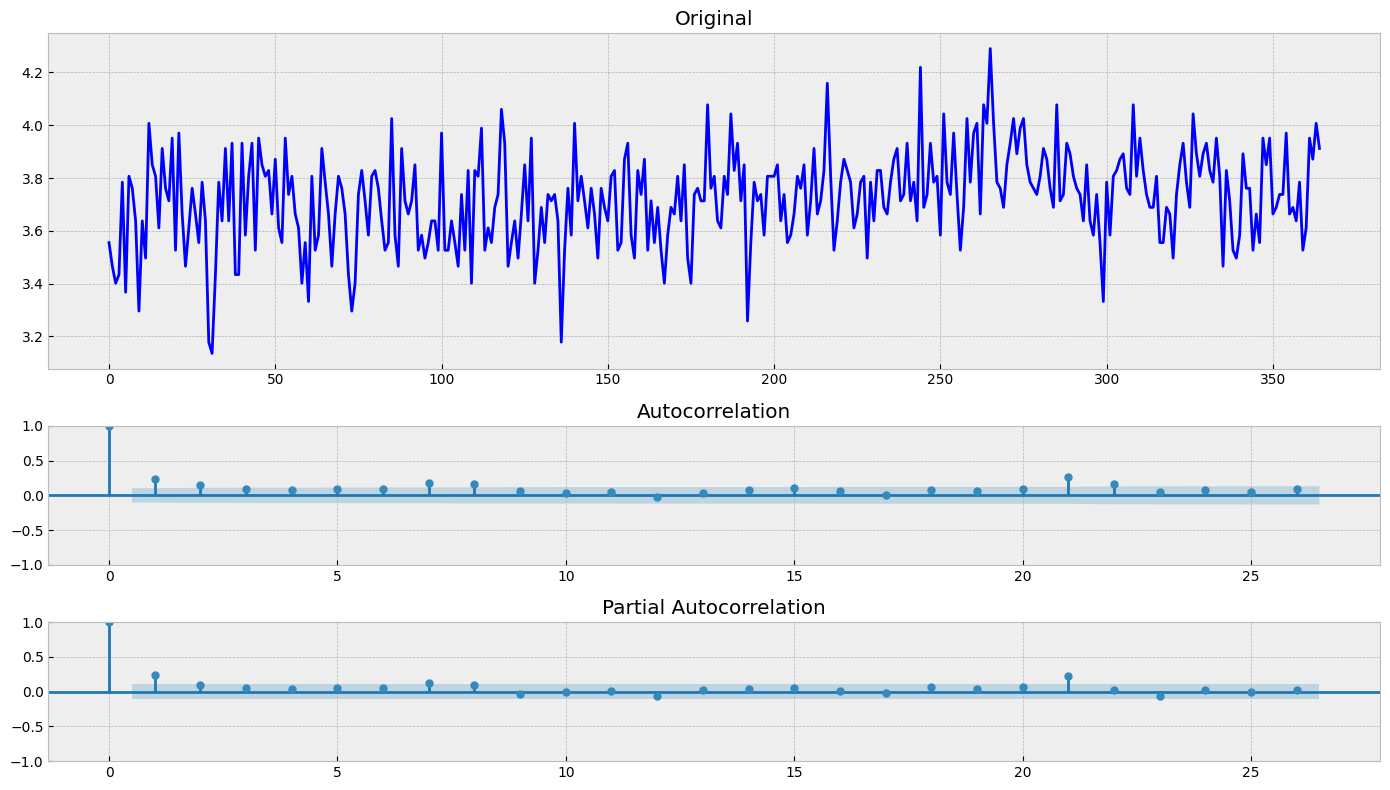

In [59]:
tsplot(boxcox(female_births['Count'],0))

Графики коррелограмм отвергают гипотезу о нестационарности рядов. Работаем дальше с 4 оставшимися рядами.


# Ищем сезонность

In [60]:
def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)

    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

In [61]:
#Подбираем цифры, чтобы найти сезонность

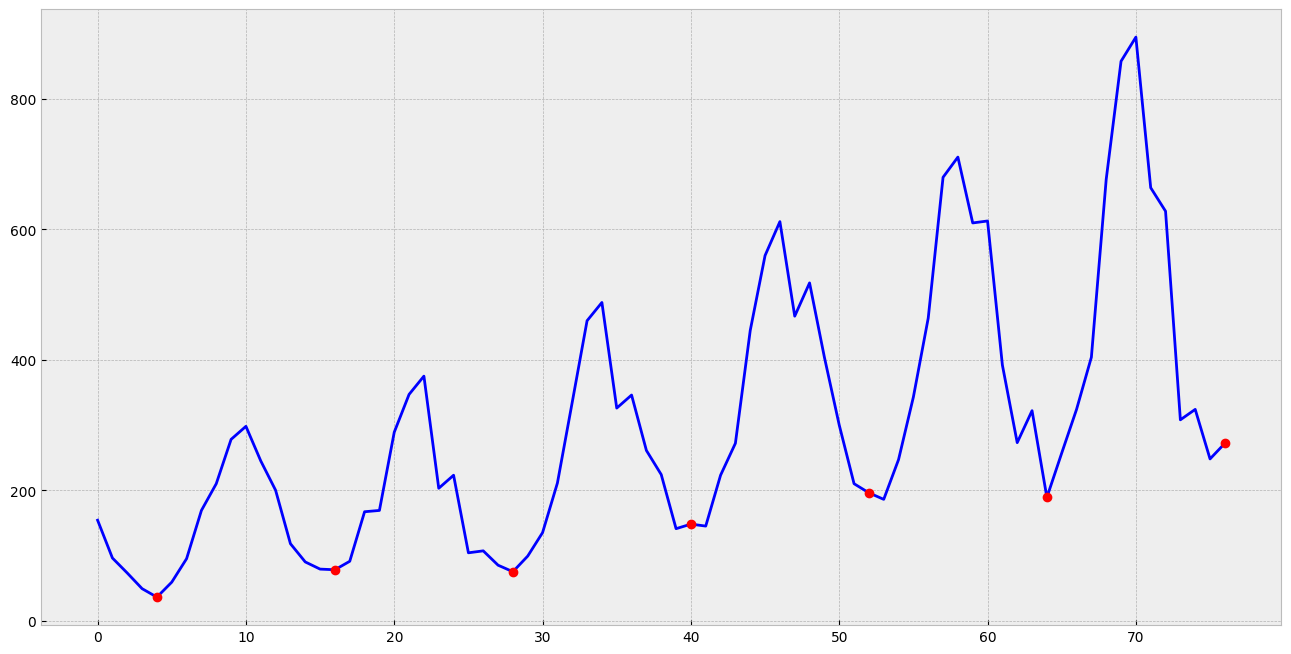

In [62]:
plot_ts_and_points(sales_of_company_x['Count'], 4, 12)

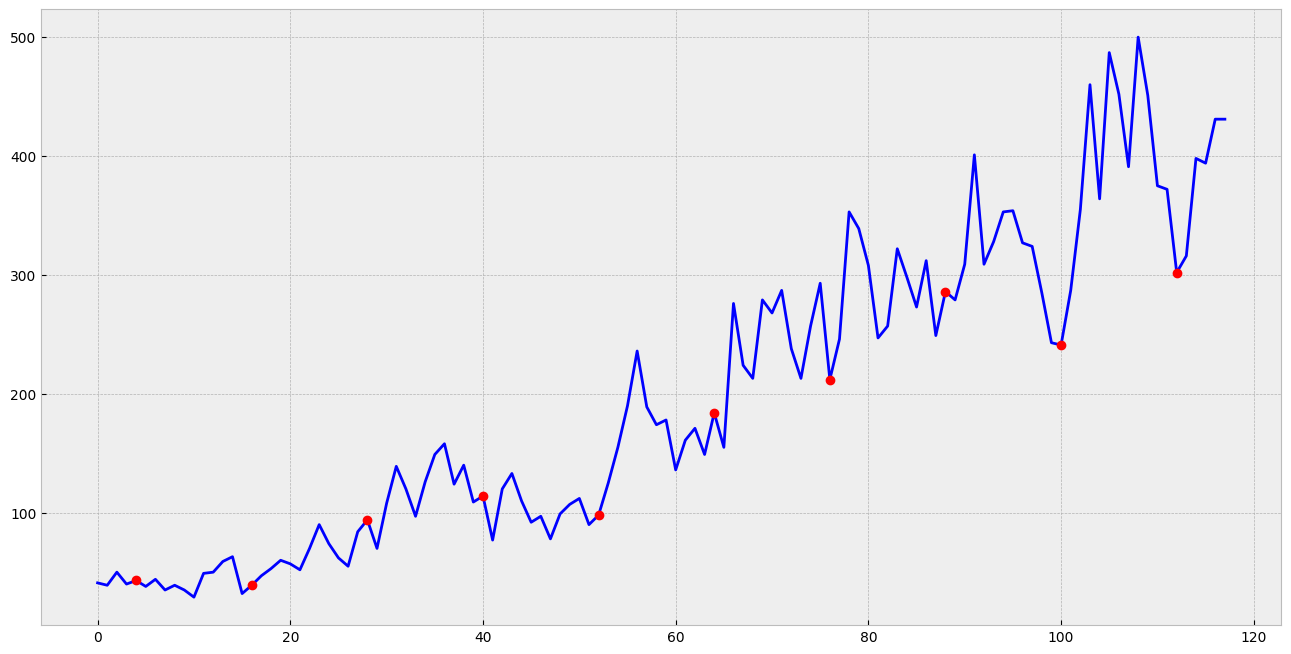

In [63]:
plot_ts_and_points(robberies_in_boston['Count'],4,12) #Здесь уже очевидно, что подобрать не выйдет

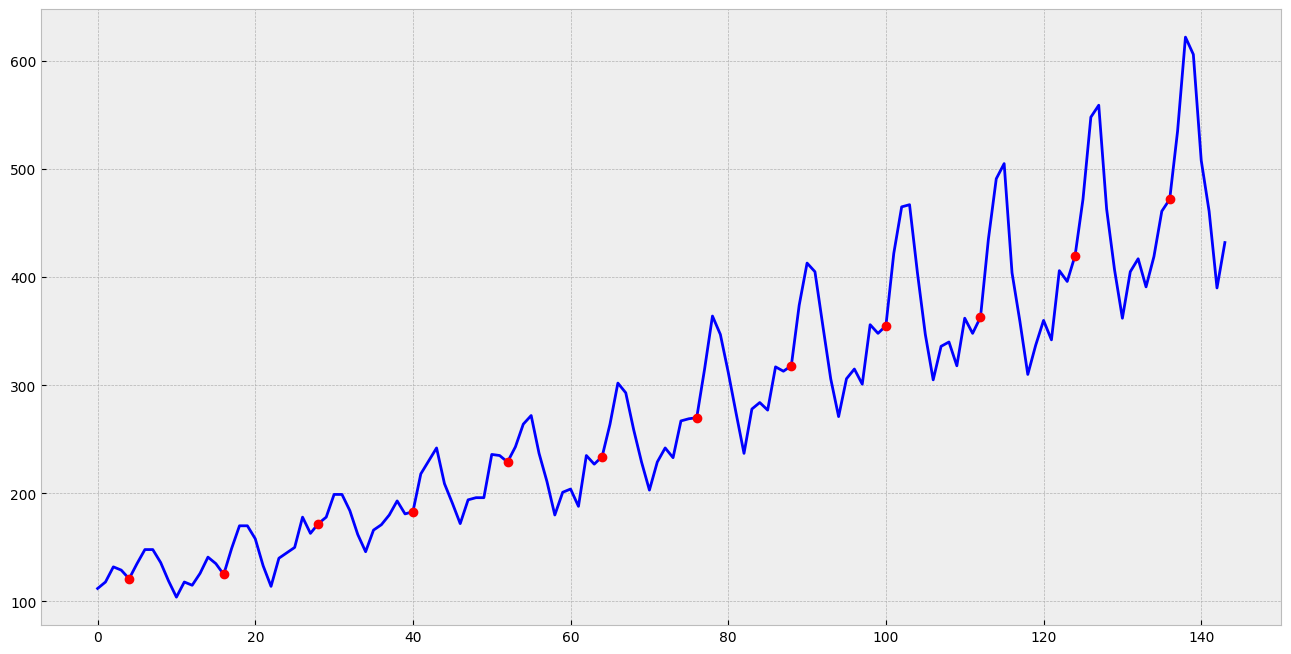

In [64]:
plot_ts_and_points(airlines_passengers['Count'],4,12)

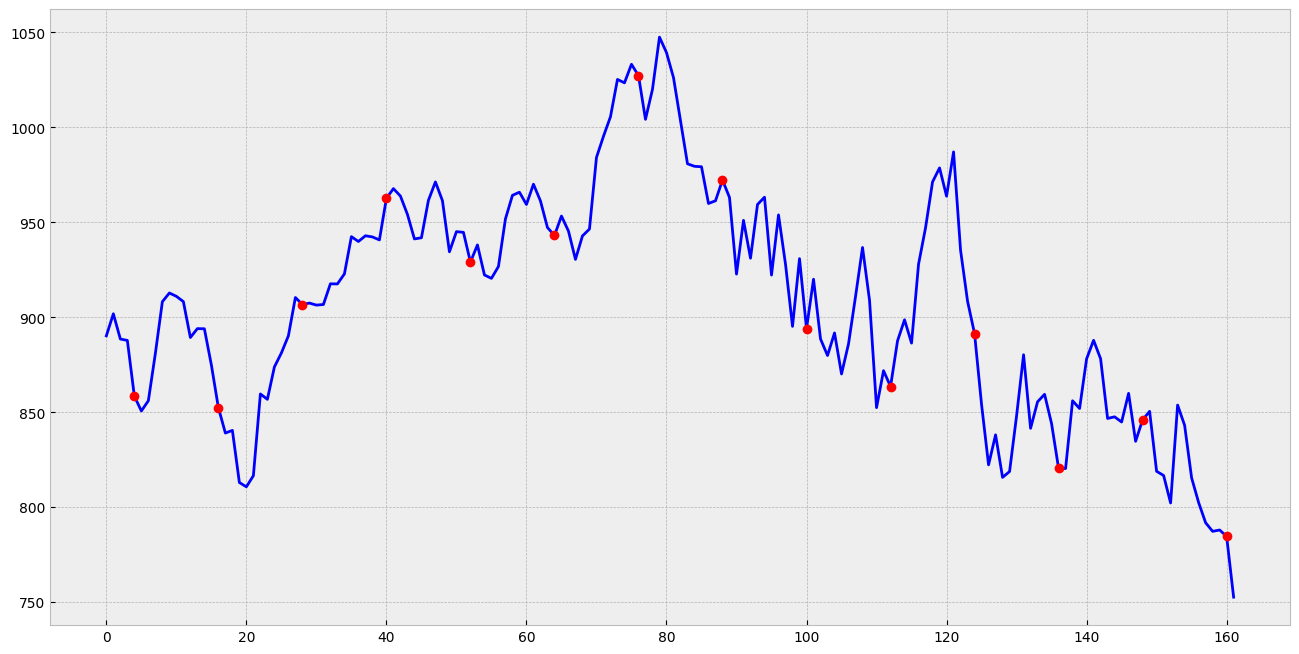

In [65]:
plot_ts_and_points(dowjones_closing['Close'],4,12) #Подобрать не вышло

Видно, что сезонность у нас есть только на рядах 1 и 3

## Анализ Monthly sales of company X

In [66]:
#  Приводим ряд к нормальному виду при помощи преобразования Бокса-Кокса

s1 = boxcox(sales_of_company_x['Count'], 0)



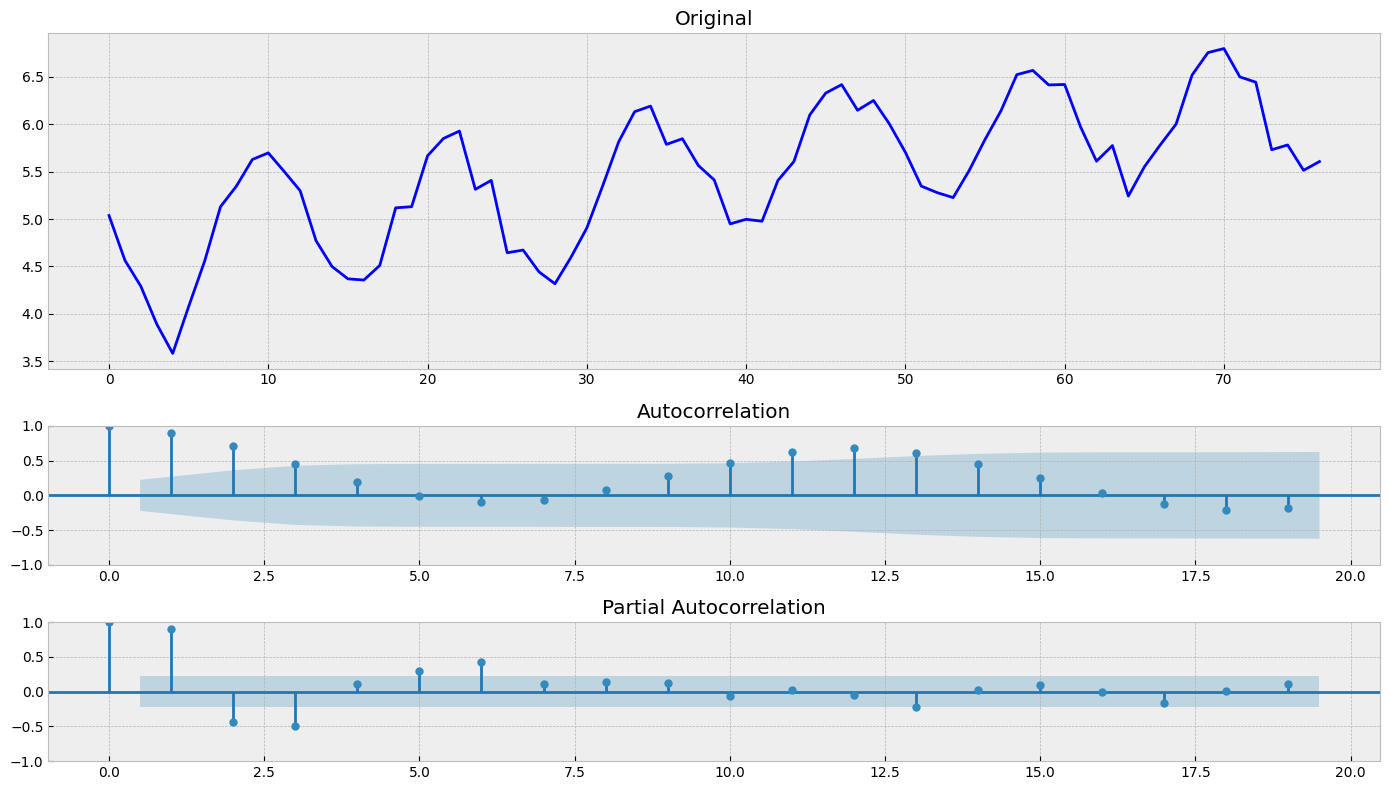

In [67]:
tsplot(s1)

In [68]:
#Стало намного лучше, но мы все еще видим тренд. уберем и его через дифференцирование. А затем уберем тренд -у нас периодичность 12, соответственно,
s1=s1[1:] - s1[:-1]
s1 = s1[12:] - s1[:-12]



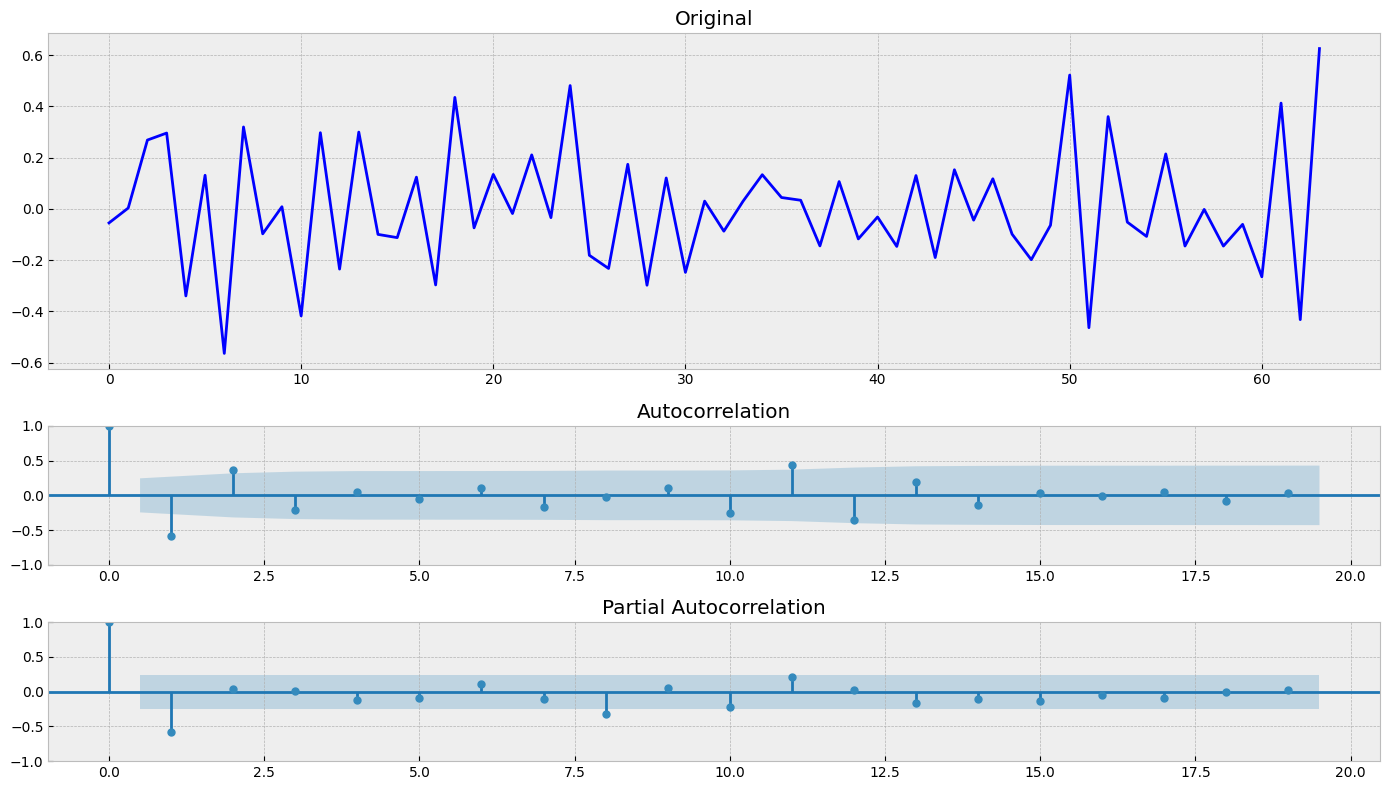

In [69]:
tsplot(s1)

In [70]:
test_stationarity(s1)

Test Statistic                 -2.316045
p-value                         0.166845
#Lags Used                     10.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64

In [71]:
#Согласно коррелограмму и тесту Дики-Фуллера, ряд теперь стационарен.

#Анализ Monthly Boston armed robberies

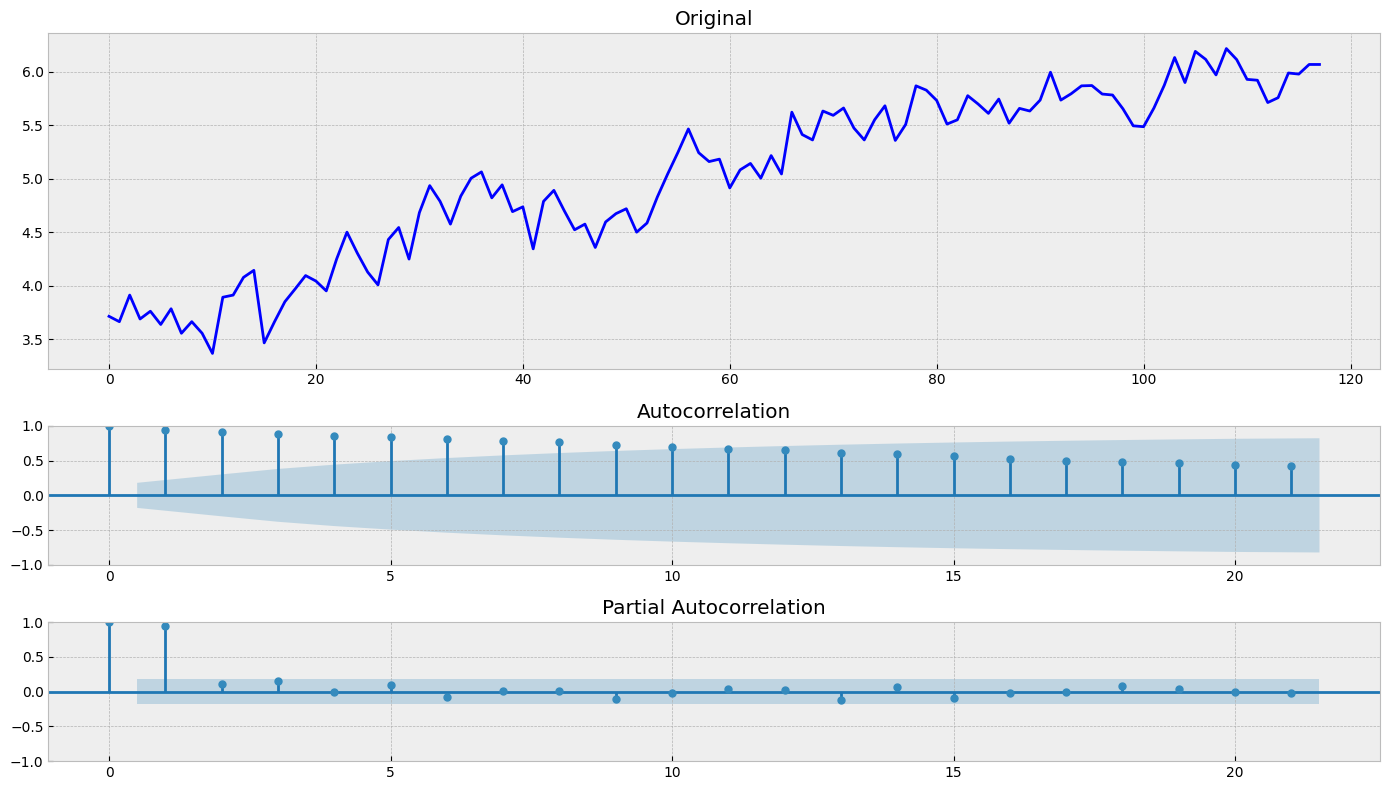

In [74]:
#Повторяем то же самое, но только с учетом что ряд без периодичности -и ее убирать не надо
s2= boxcox(robberies_in_boston['Count'], 0)
tsplot(s2)

In [75]:
s2=s2[1:] - s2[:-1] #Дифференцирование

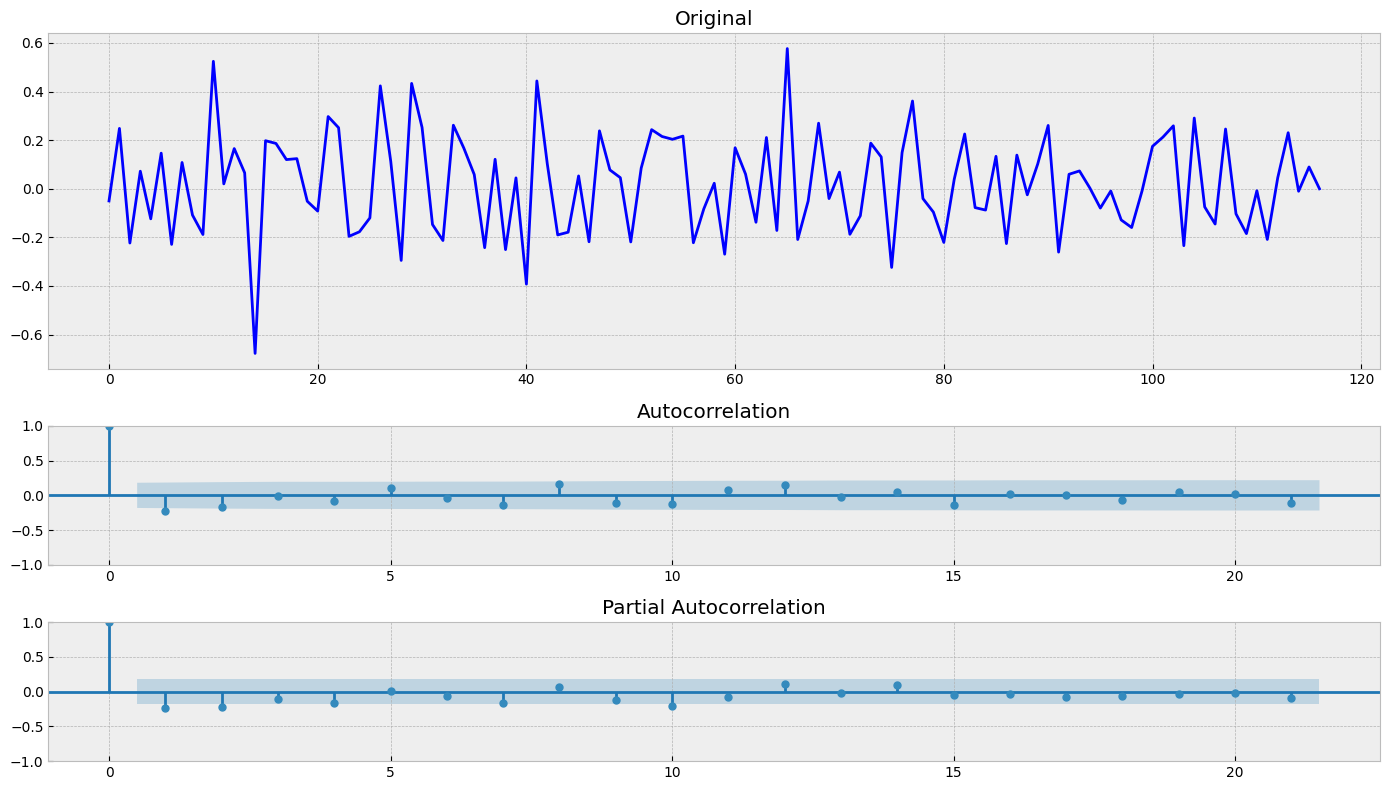

In [76]:
tsplot(s2)

In [82]:
test_stationarity(s2)

Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64

In [ ]:
#По результатам теста Дики- Фуллера и анализа коррелограмма, мы можем сказать, что ряд теперь стационарен.

# Анализ International airline passengers: monthly totals in thousands

In [80]:
#Повторяем
s3 = boxcox(airlines_passengers['Count'], 0)

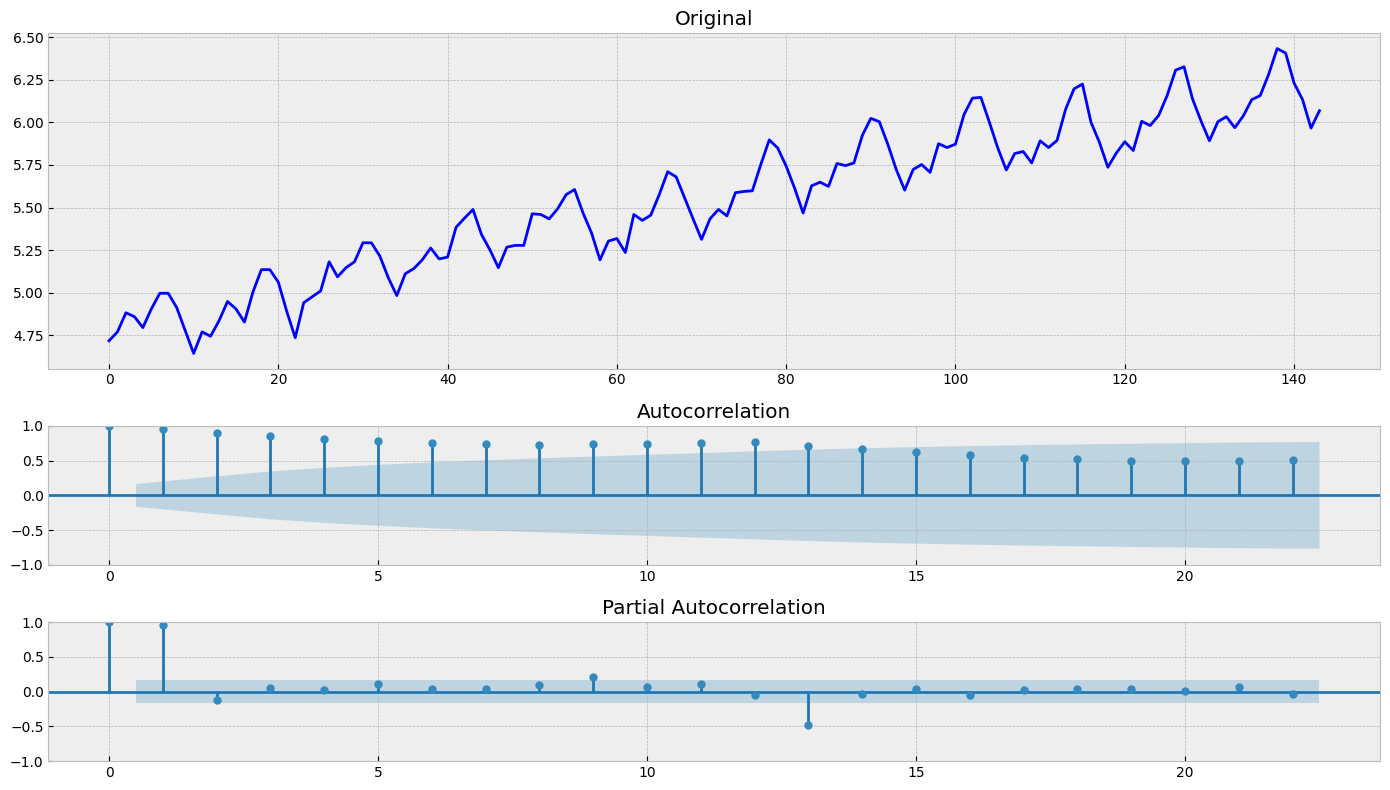

In [81]:
tsplot(s3)

In [83]:
test_stationarity(s3)

Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

In [84]:
#Убираем тренд и сезонность
s3=s3[1:] - s3[:-1]
s3 = s3[12:] - s3[:-12]


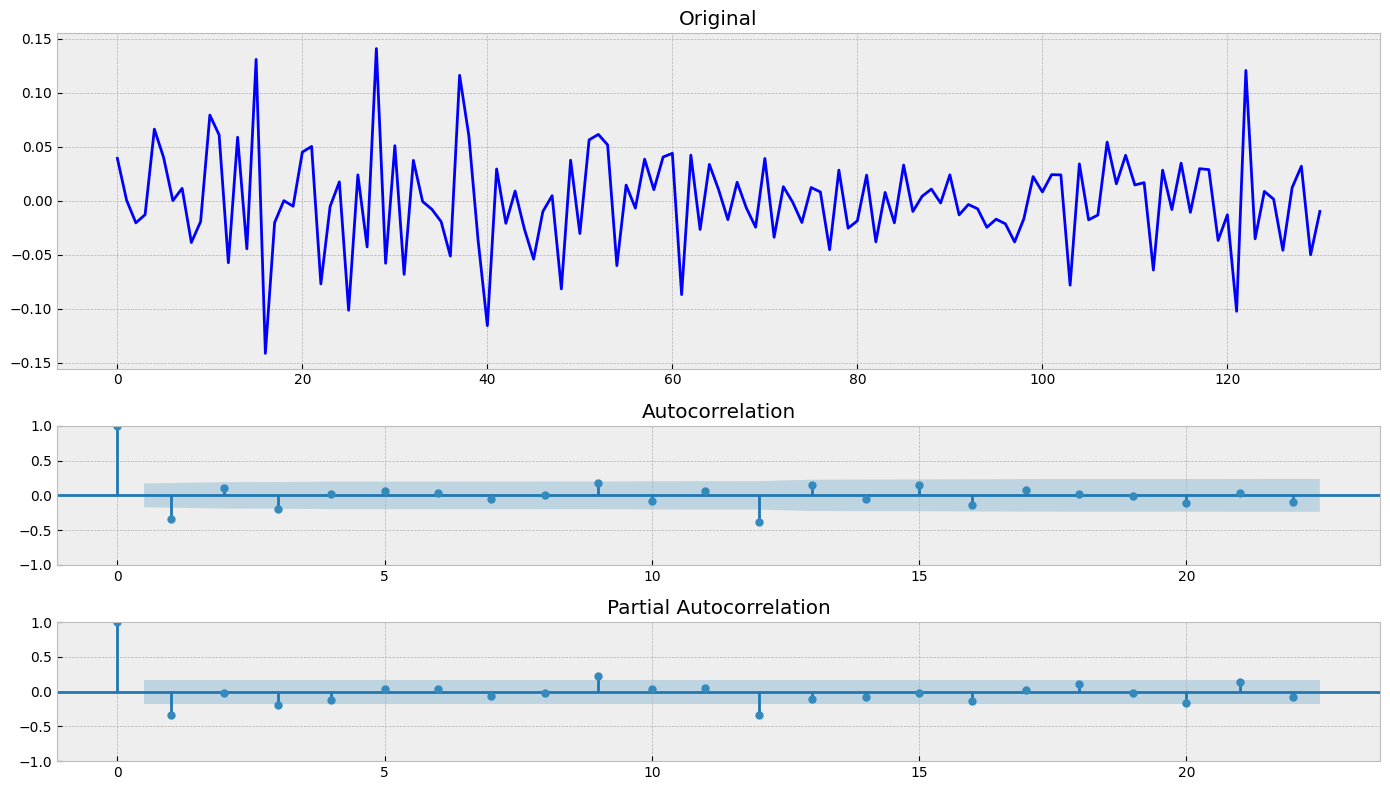

In [85]:
tsplot(s3)

In [86]:
test_stationarity(s3)

Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64

In [87]:
#Ура, ряд стационарен!

#Анализ  Weekly closings of the Dow-Jones industrial average

In [88]:
s4 = boxcox(dowjones_closing['Close'], 0)

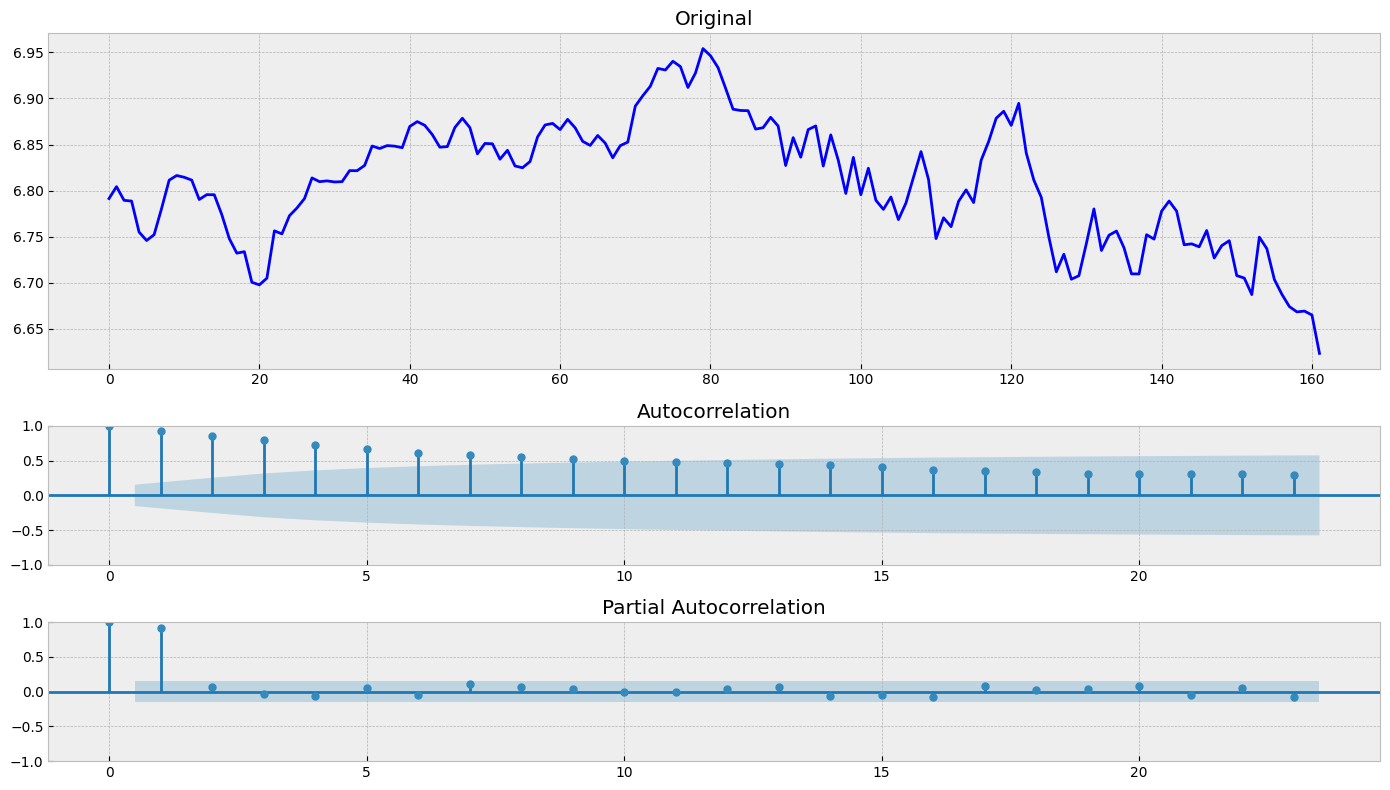

In [89]:
tsplot(s4)

In [90]:
test_stationarity(s4)

Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64

In [91]:
#Убираем тренд
s4=s4[1:] - s4[:-1]


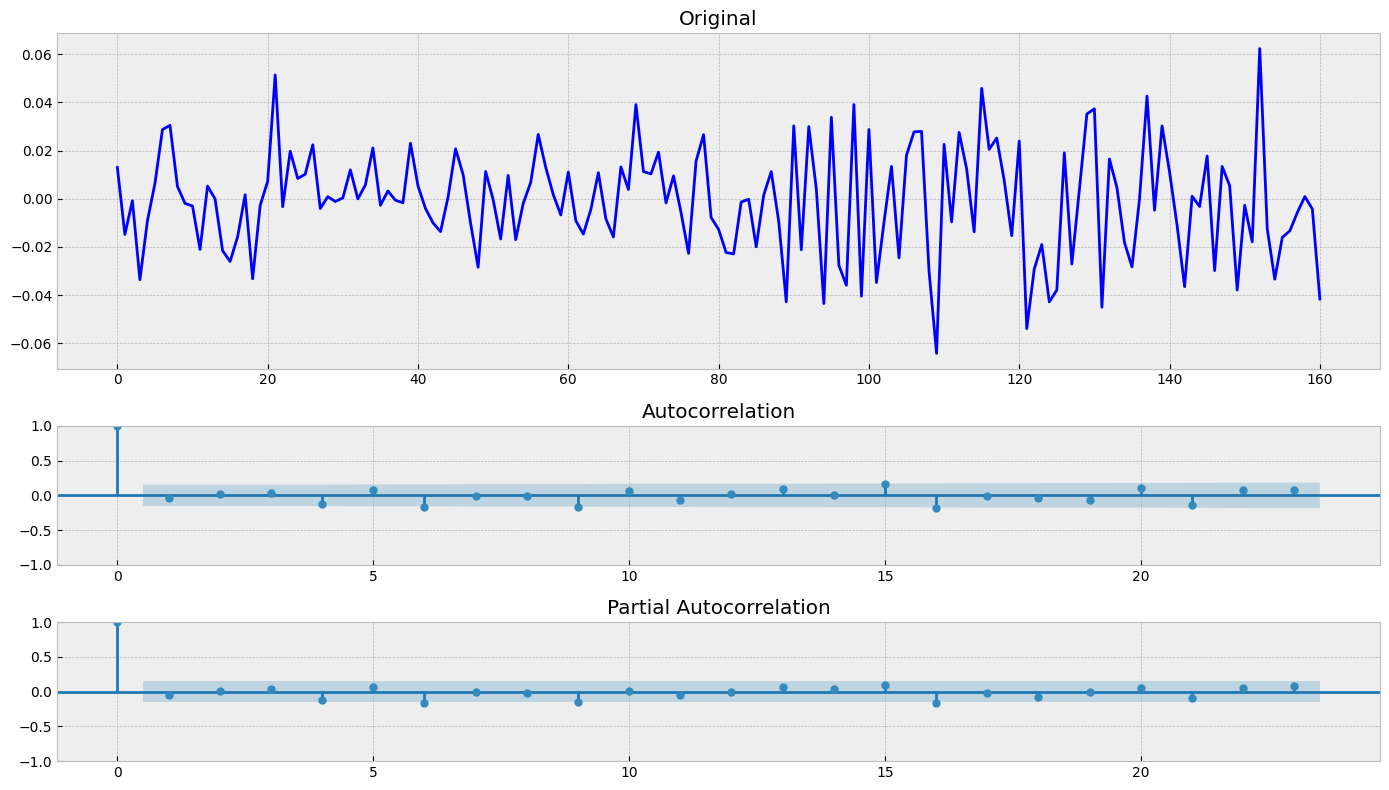

In [92]:
tsplot(s4)

In [93]:
test_stationarity(s4)

Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64

In [ ]:
#Все, ряд стационарен

# Итог

Мы провели анализ 6 временных рядов и привели их к стационарным.